# TECH CHALLENGE - 1IADT - Fase 1

### Grupo 12
#### Componentes
* Silas Pereira Costa - RM355822
* Wesley Gomes Santos - RM

#### Modelo preditivo para identificação do valor dos custos médicos individuais cobrados pelo seguro saúde

O objetivo deste estudo é realizar análises de previsões de valores de encargos cobrados pelo seguro saúde. Realizaremos as análises com o modelo LinearRegression.

##### Conclusões:

* O dataset contém 1337 registros.
* Encontramos relação entre encargos do seguro saúde e:
* * Smoker.
* * Age.
* Encontramos relação entre BMI e a região southeast.
* A primeira análise do modelo LinearRegression obteve um R2 de 0.87 utilizando somente LabelEncoder na transformação dos grupos de dados.
* A segunda análise do modelo LinearRegression obteve um R2 de 0.75 utilizando LabelEncoder nos grupos de dados comuns e one hot encoder no campo region.
* A segunda análise, apesar do R2 mais baixo, aparenta abranger mais o modelo de predição.



###### Créditos do dataset:
https://www.kaggle.com/datasets/mirichoi0218/insurance

****
Preparação do ambiente com a instalação dos pacotes necessários.

In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 539.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 16.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 1.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 13.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 495.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━

### Exploração de dados

Definição do nome da base de dados.

In [2]:
# Nome da base de dados
NOME_BASE_DE_DADOS = "../Base_de_dados/insurance.csv"

Importando a base de dados com o pandas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings #remoção de avisos


import numpy as np
# np.random.seed(42)

# Importando a base de dados
dados_original = pd.read_csv(NOME_BASE_DE_DADOS, sep=",")

Removendo os registros duplicados via pandas.

In [5]:
# lista os registros duplicados
def list_duplicated(dados):
    duplicados = dados.duplicated()
    numero_duplicados = duplicados.sum()
    print(f"Número de registros duplicados: {numero_duplicados}")

    linhas_duplicadas = dados[duplicados]
    #print(linhas_duplicadas)


# remove os registros duplicados
def remove_duplicated(dados):
    list_duplicated(dados);
    print(dados.shape)
    print("removendo dados duplicados...")
    # Removendo duplicados (por padrão, mantém a primeira linha)
    dados = dados.drop_duplicates()
    # reindexando a base de dados
    dados = dados.reset_index(drop=True)
    print(dados.shape)
    return dados

dados_original = remove_duplicated(dados_original)

Número de registros duplicados: 1
(1338, 7)
removendo dados duplicados...
(1337, 7)


### Analise estatísticas descritivas e distribuições relevantes.

* Campos sex, smoker e region estão com valores textuais, sendo necessários tratamentos para funcionamento do algorítmo.

In [8]:
dados_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1337 Linhas
7 Colunas

In [9]:
# Informações estruturais sobre o dataframe
dados_original.shape


(1337, 7)

In [10]:
# Estatísticas sobre o dataframe
display(dados_original.describe())

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Pré-processamento de dados

Verificando se existem valores nulos nas informações.
* Não identificamos conteúdos nulos na base de dados.

In [11]:
# Verificando a ausência de informações
dados_original.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
print("Informações sobre o DataFrame dados:")
print(dados_original.info())

Informações sobre o DataFrame dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


### Feature scalling dos dados.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dados=dados_original.copy()

# Transformando os campos com label encoder
dados['sex'] = label_encoder.fit_transform(dados['sex'])
dados['smoker'] = label_encoder.fit_transform(dados['smoker'])
# Realizando a cópia do dataset dados antes da transformação do campo region.
dados_dummies = dados.copy()
dados['region'] = label_encoder.fit_transform(dados['region'])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Transformando o campo region, realizando o one hot encoding.

In [14]:
dados_dummies = pd.get_dummies(dados_dummies, columns=["region"])

dados_dummies.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [15]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.0 KB


Realizando a transformação do conteúdo dos campos region_*, tendo como resultado tipo inteiro.

In [16]:
dados_dummies['region_northeast'] = label_encoder.fit_transform(dados_dummies['region_northeast'])
dados_dummies['region_northwest'] = label_encoder.fit_transform(dados_dummies['region_northwest'])
dados_dummies['region_southeast'] = label_encoder.fit_transform(dados_dummies['region_southeast'])
dados_dummies['region_southwest'] = label_encoder.fit_transform(dados_dummies['region_southwest'])

In [17]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.6 KB


In [18]:
dados_dummies.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### Estatísticas dos dados

Fumante ou não fumante.

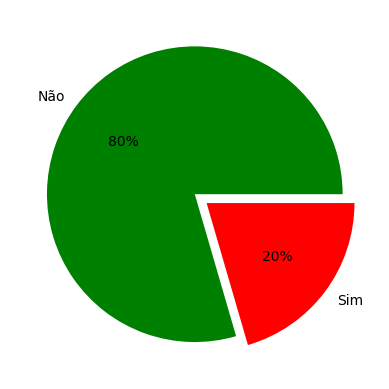

In [19]:
categororias = ["Não", "Sim"]
plt.pie(dados["smoker"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

[Text(8.375000000000002, 0.5, '')]

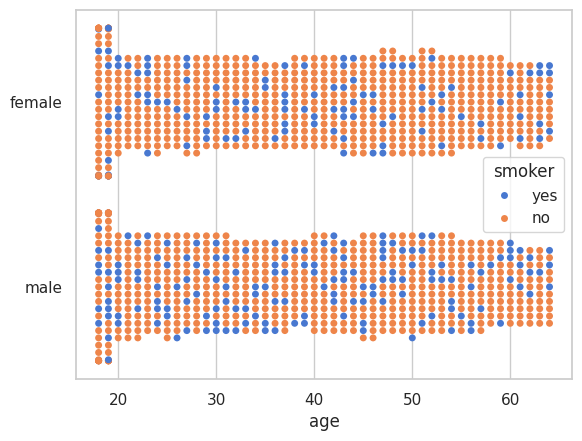

In [20]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=dados_original, x="age", y="sex", hue="smoker")
ax.set(ylabel="")

Porcentagem de homens e mulheres.

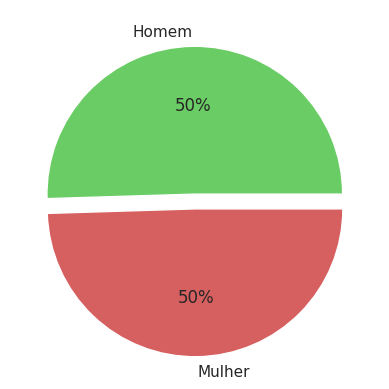

In [21]:
categororias = ["Homem", "Mulher"]
plt.pie(dados["sex"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

Relação BMI e sexo

/tmp/ipykernel_4843/4045041492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')


<Axes: xlabel='sex', ylabel='bmi'>

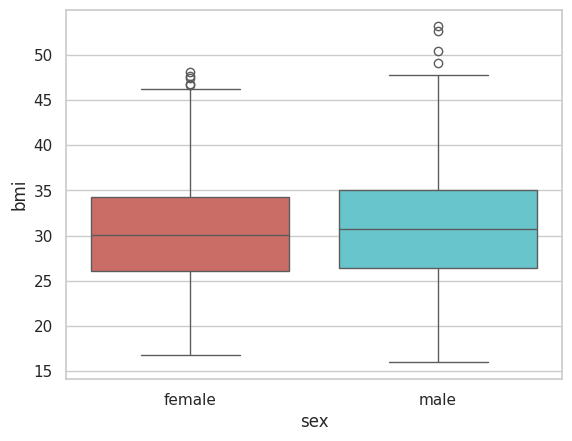

In [22]:
sns.boxplot(x='sex', y='bmi', data=dados_original, palette='hls')

Histograma da idade

<Axes: xlabel='age', ylabel='Count'>

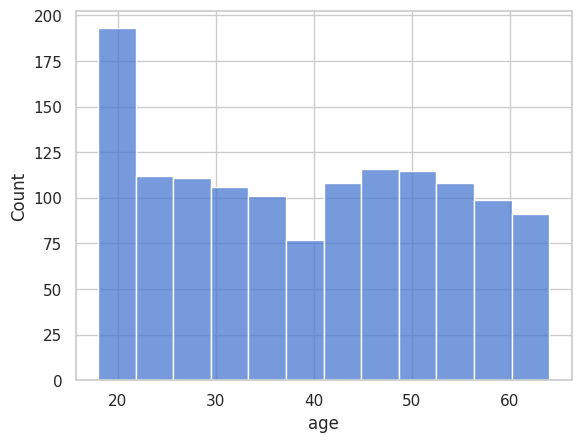

In [23]:
sns.histplot(data=dados, x="age")

Média de idade.

<Axes: xlabel='age'>

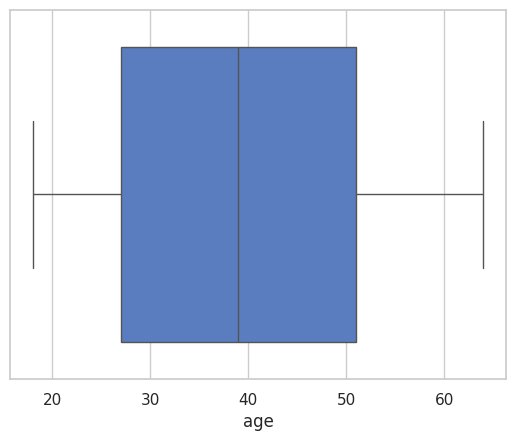

In [24]:
sns.boxplot(x=dados["age"])

Histograma do BMI

<Axes: xlabel='bmi', ylabel='Count'>

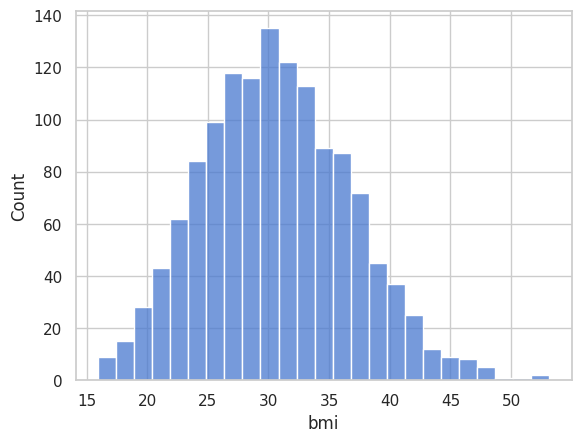

In [25]:
sns.histplot(data=dados, x="bmi")

Outliers do BMI
* Foram encontrados outliers do BMI acima do limite em torno de 47.

<Axes: xlabel='bmi'>

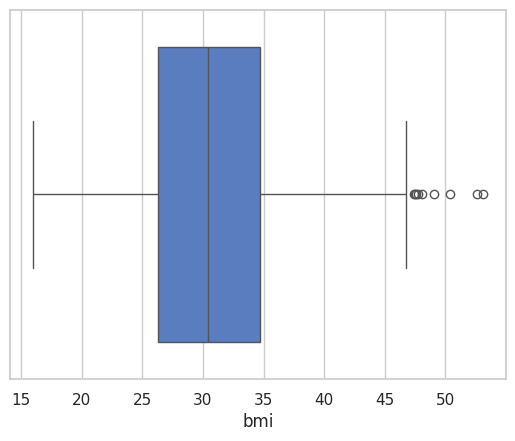

In [26]:
sns.boxplot(x=dados["bmi"])

Matriz de correlação envolvendo o dataset dados.

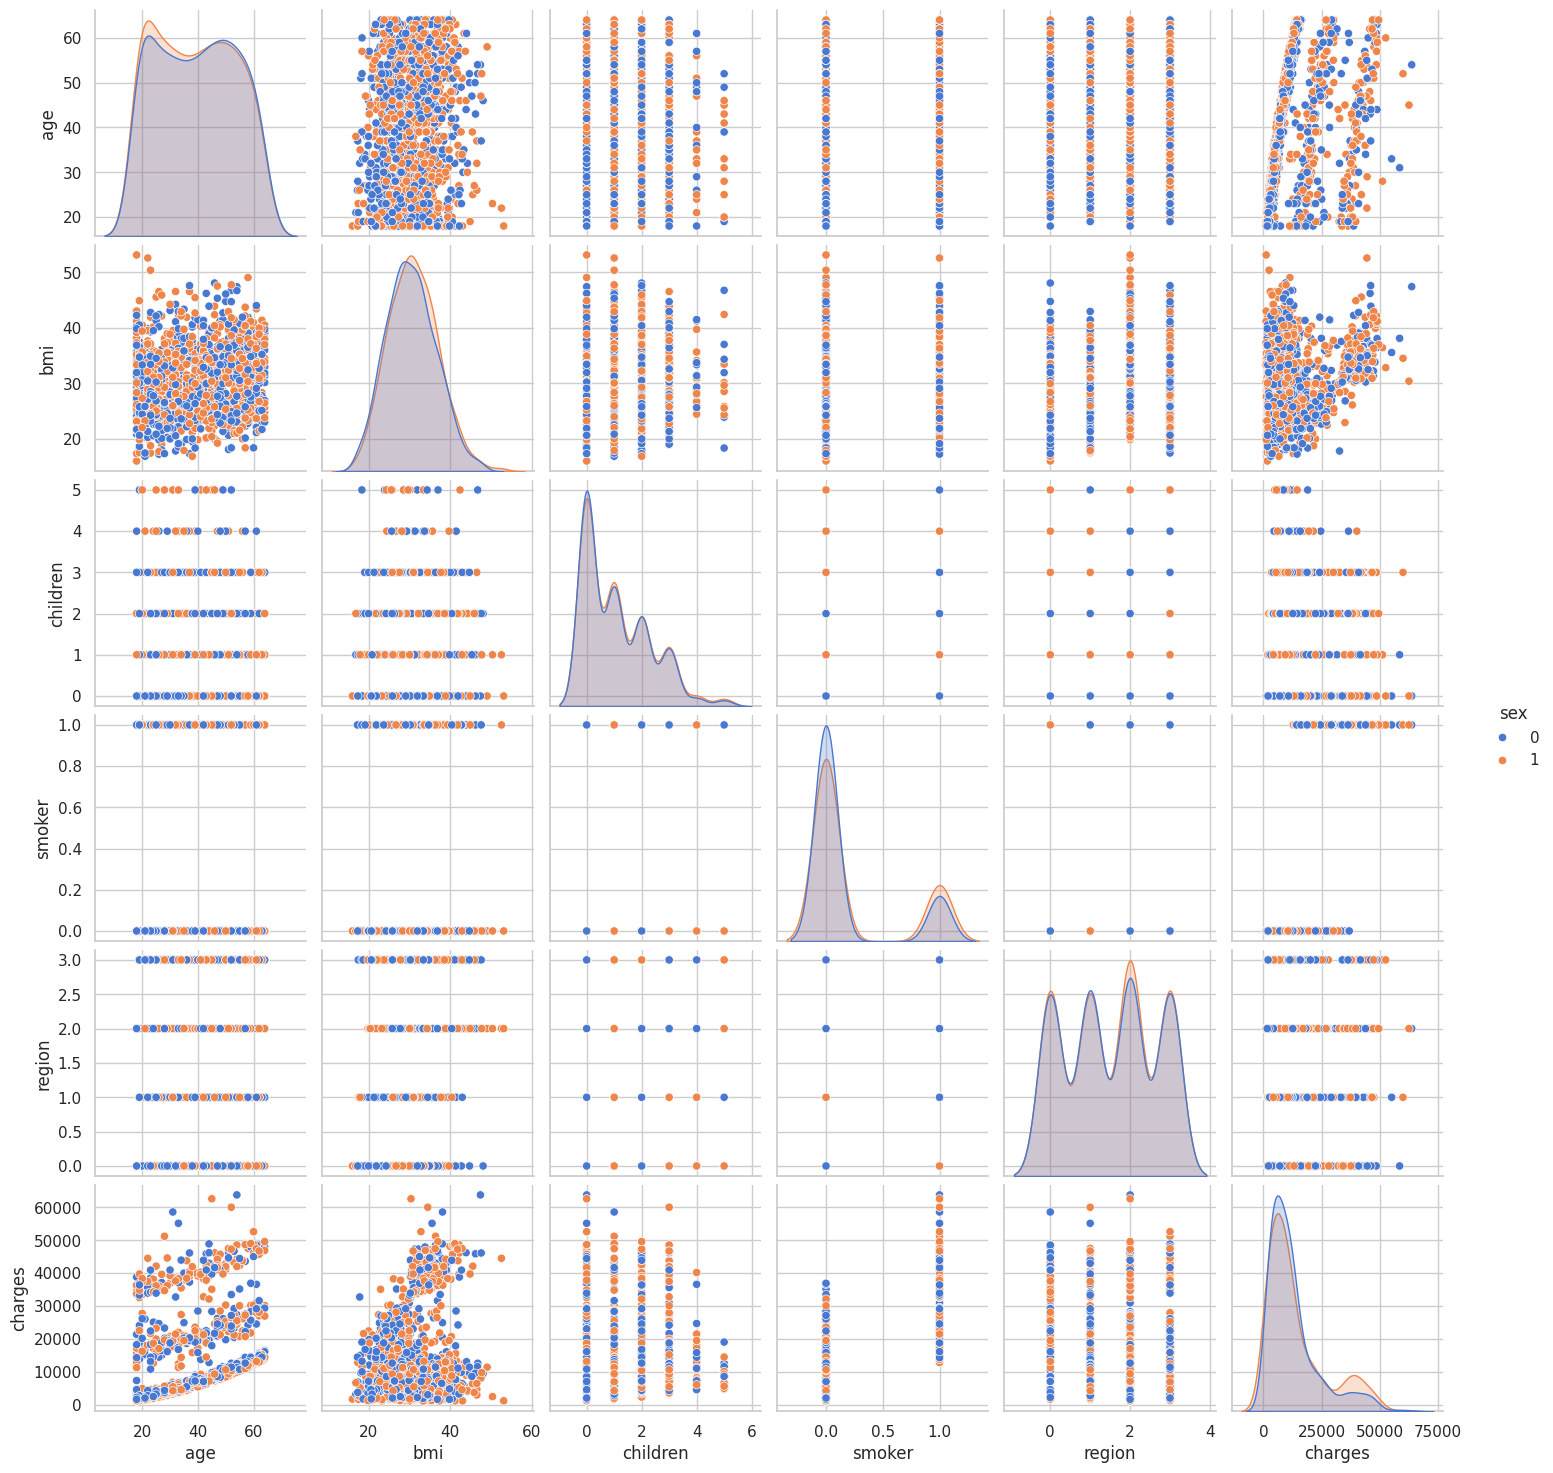

In [27]:
sns.pairplot(dados,vars=['age', 'bmi', 'children', 'smoker', 'region', 'charges'],hue="sex", )

Matriz de correlação envolvendo o dataset dados_dummies, onde contém o one hot encoding do campo region.

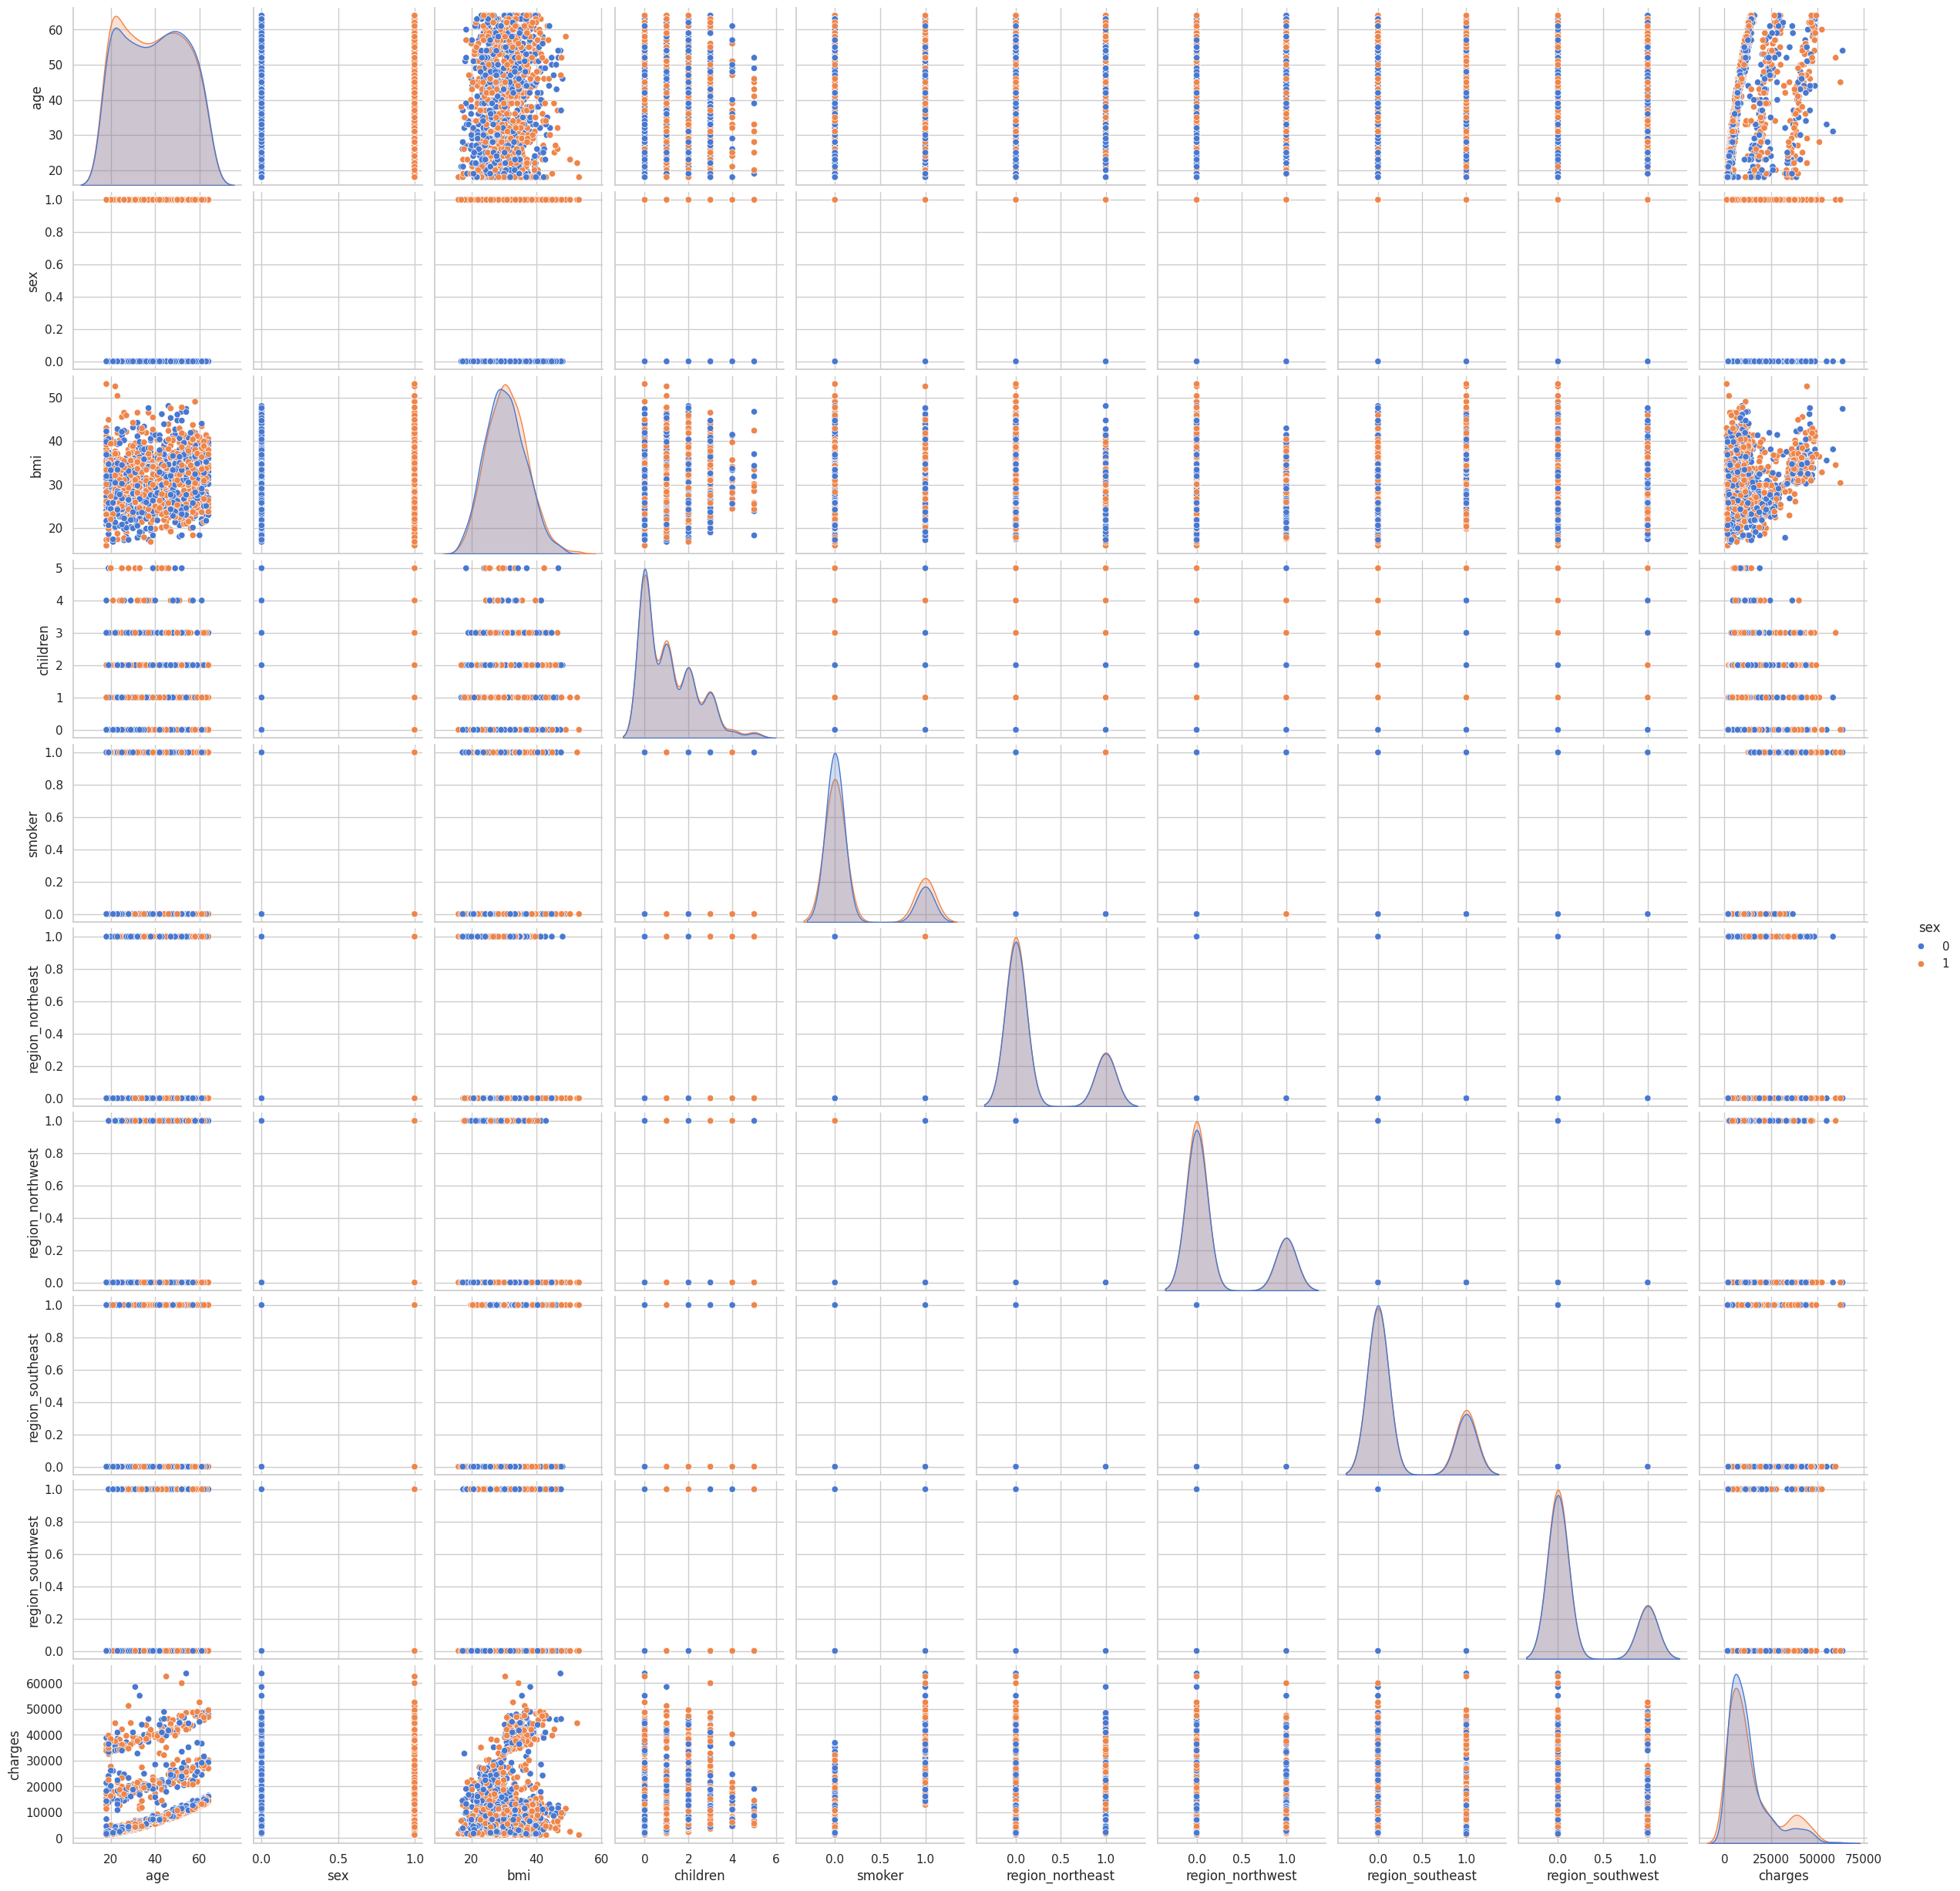

In [28]:
sns.pairplot(dados_dummies,vars=['age', 'sex', 'bmi' , 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges'],hue="sex", )

Matriz de correlação envolvendo o dataset dados.

<Axes: >

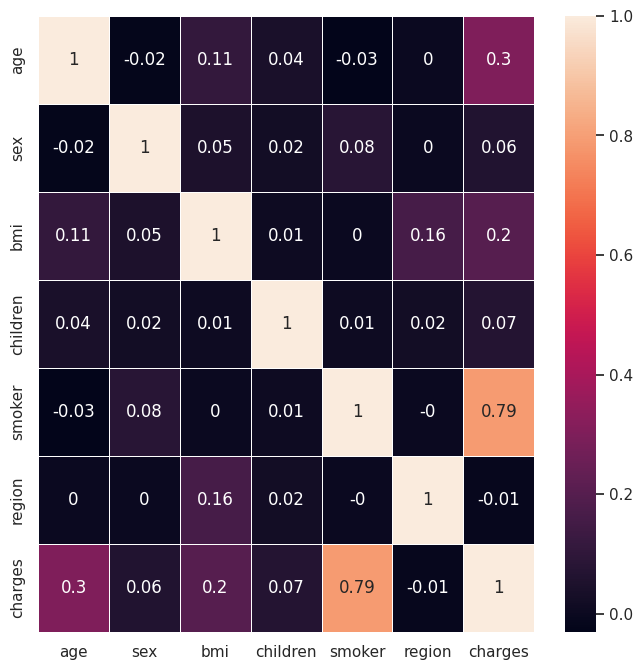

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Matriz de correlação envolvendo o dataset dados_dummies, onde contém o one hot encoding do campo region.

<Axes: >

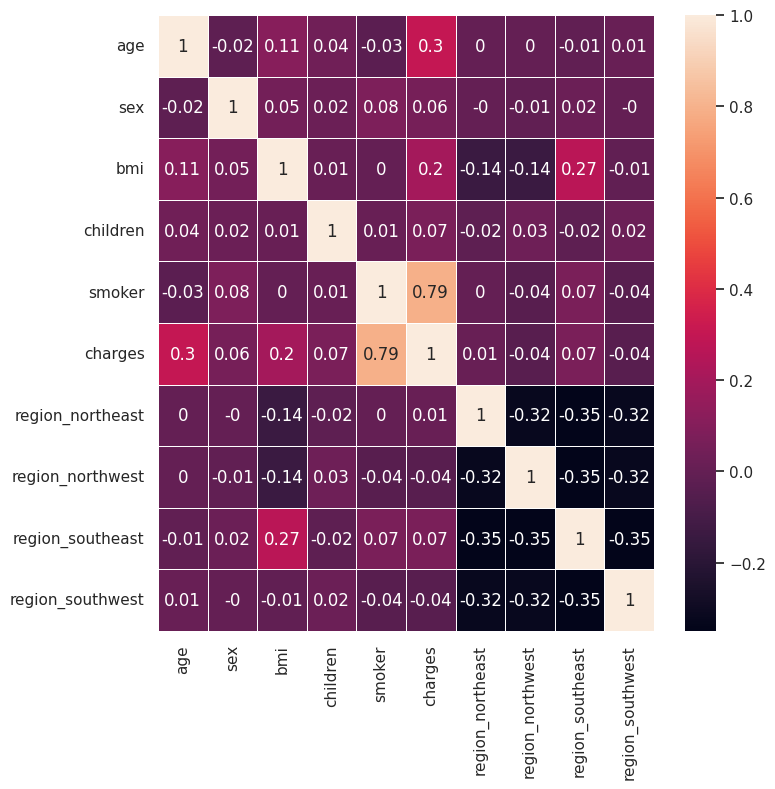

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = dados_dummies.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Charges

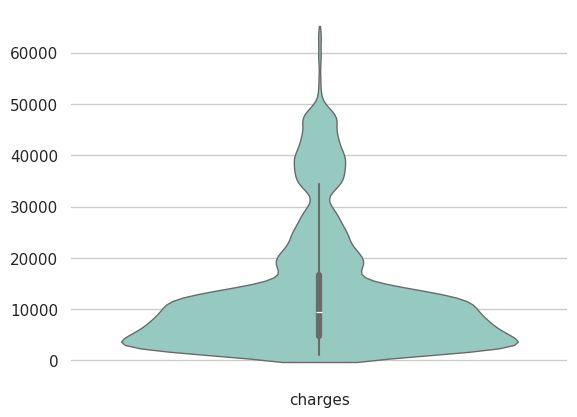

In [31]:
sns.violinplot(data=dados[['charges']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Age e BMI.
* BMI: Maior grupo de medições na faixa de 53,13 a 53,13.
* Age: Fluxo de idade entre a faixa de 18 e 64

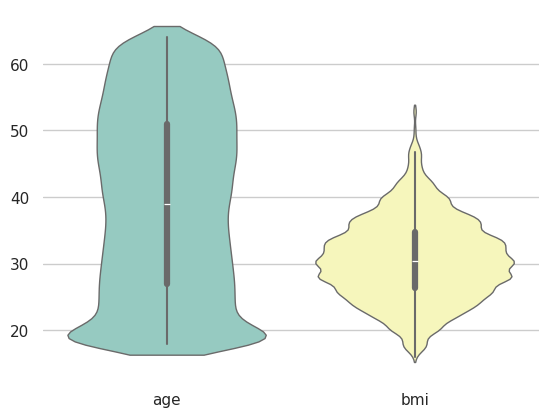

In [32]:
sns.violinplot(data=dados[['age', 'bmi']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Preparando os dados dos eixos X e Y para uso na padronização dos dados.

In [33]:
from sklearn.preprocessing import StandardScaler

features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region'] #, 'charges']
X = dados[features].values
y = dados['charges'].values

### Modelagem

#### Treinamento e avaliação do modelo

##### Modelo LinearRegression
* Dataset dados.

In [34]:
! pip install statsmodels

Treinando o modelo OLS.

In [35]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
X = dados[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# Definir a variável dependente (Y)
Y = dados['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS = sm.OLS(Y, X).fit()

# Imprimir os resultados do modelo
print(modelo_OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1536.
Date:                Sun, 26 May 2024   Prob (F-statistic):                        0.00
Time:                        16:31:34   Log-Likelihood:                         -13611.
No. Observations:                1337   AIC:                                  2.723e+04
Df Residuals:                    1331   BIC:                                  2.727e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Teste de previsão de encargos

In [36]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker', 'region']
print(modelo_OLS.predict([41   , 1    , 27.755, 0         , 0       , 1       ]))
print(modelo_OLS.predict([41   , 1    , 18.5  , 0         , 0       , 1       ]))


[8668.72038348]
[8089.32886208]


Imprimindo as estatísticas do modelo OLS.

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS = modelo_OLS.predict(X)

# Calcular MAE, MSE e RMSE
mae_OLS = mean_absolute_error(Y, y_pred_OLS)
mse_OLS = mean_squared_error(Y, y_pred_OLS)
rmse_OLS = np.sqrt(mse_OLS)

# Imprimindo as métricas
print(f'MAE: {mae_OLS}')
print(f'MSE: {mse_OLS}')
print(f'RMSE: {rmse_OLS}')

MAE: 4401.852239154551
MSE: 40751910.019925125
RMSE: 6383.722269955447


Gráficos de previsões versus valores reais
* Charges em torno de 25.000 e 17.000 não estão nas estatísticas de teste.
* Charges em torno de 39.000 e 65.000 não estão nas estatísticas de teste.

In [49]:
# Transformando conteúdo de vetores numpy em listas comuns para uso em dataframes.
def transformar_vetor(lista_numpy):
    saida = [item for item in lista_numpy]
    return saida

y_vetor = transformar_vetor(Y.values)
y_pred_OLS_vetor = transformar_vetor(y_pred_OLS.values)

pd_predicao = pd.DataFrame({'charges': y_vetor, 'charges_prevision': y_pred_OLS_vetor})

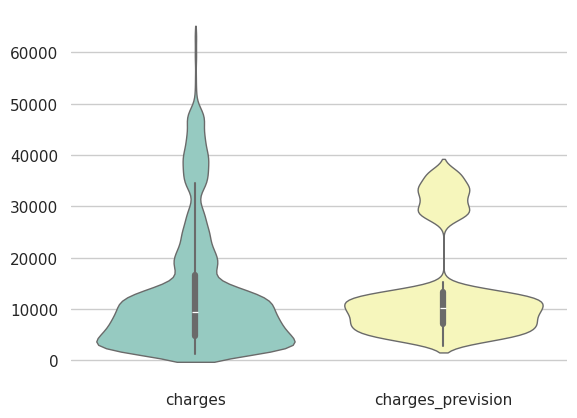

In [40]:

sns.violinplot(data=pd_predicao[['charges', 'charges_prevision']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Maior acertividade encontrada na faixa entre 2.000 e 17.000

/tmp/ipykernel_4843/987563025.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


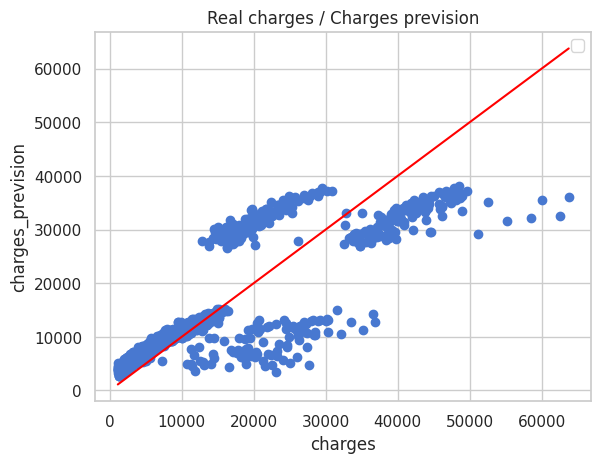

In [41]:
plt.scatter(y_vetor, y_pred_OLS_vetor)
plt.xlabel('charges')
plt.ylabel('charges_prevision')
    
plt.title('Real charges / Charges prevision')


ideal_values = np.linspace(min(y_vetor), max(y_vetor)) 
plt.plot(ideal_values, ideal_values, color='red')
plt.legend()
plt.show()

*****
#### Treinamento e avaliação do modelo

##### Modelo LinearRegression
* Dataset dados_dummies, ou seja com hot encoding no campo region.

In [42]:
import statsmodels.api as sm

# Definir as variáveis independentes (X)
X2 = dados_dummies[['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
# Definir a variável dependente (Y)
Y2 = dados_dummies['charges']

# Criar e ajustar o modelo de regressão linear múltipla
modelo_OLS2 = sm.OLS(Y2, X2).fit()

# Imprimir os resultados do modelo
print(modelo_OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        16:33:21   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.7646     11.912  

#### Teste de previsão de encargos

In [43]:
#                        ['age', 'sex', 'bmi' , 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
print(modelo_OLS2.predict([41   , 1    , 27.755, 0         , 0       , 1                , 0                 , 0                 , 0                 ]))
print(modelo_OLS2.predict([41   , 1    , 18.5  , 0         , 0       , 1                , 0                 , 0                 , 0                 ,]))


[7877.20390097]
[4737.44178491]


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# realizar as previsões
y_pred_OLS2 = modelo_OLS2.predict(X2)

# Calcular MAE, MSE e RMSE
mae_OLS2 = mean_absolute_error(Y2, y_pred_OLS2)
mse_OLS2 = mean_squared_error(Y2, y_pred_OLS2)
rmse_OLS2 = np.sqrt(mse_OLS2)

# Imprimindo as métricas
print(f'MAE: {mae_OLS2}')
print(f'MSE: {mse_OLS2}')
print(f'RMSE: {rmse_OLS2}')

MAE: 4173.489618347102
MSE: 36528121.63726907
RMSE: 6043.849901947357


Gráficos de previsões versus valores reais.
* Faixa entre 20.000 e 22.000 sem charges previstos.
* Faixa entre 42.000 e 65.000 sem charges previstos.
* Apesar do modelo ter menor r2, o mesmo tem menor faixa interna com ausência de dados previstos.

In [46]:
y_vetor2 = transformar_vetor(Y2.values)
y_pred_OLS_vetor2 = transformar_vetor(y_pred_OLS2.values)

pd_predicao2 = pd.DataFrame({'charges': y_vetor2, 'charges_prevision': y_pred_OLS_vetor2})

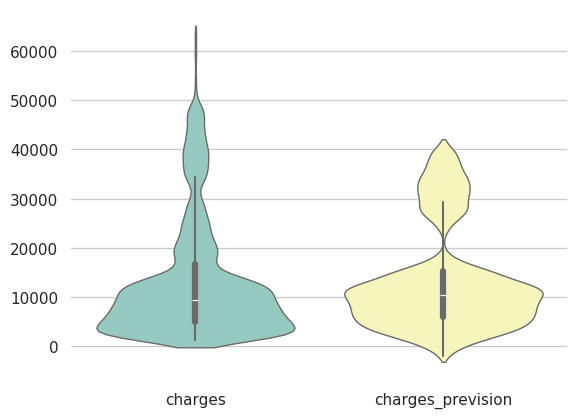

In [47]:

sns.violinplot(data=pd_predicao2[['charges', 'charges_prevision']], bw_adjust=.5, cut=1, linewidth=1, palette="Set3")

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

Apesar do modelo ter menor r2, o mesmo tem menor faixa interna com ausência de dados previstos.

/tmp/ipykernel_4843/1033184004.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


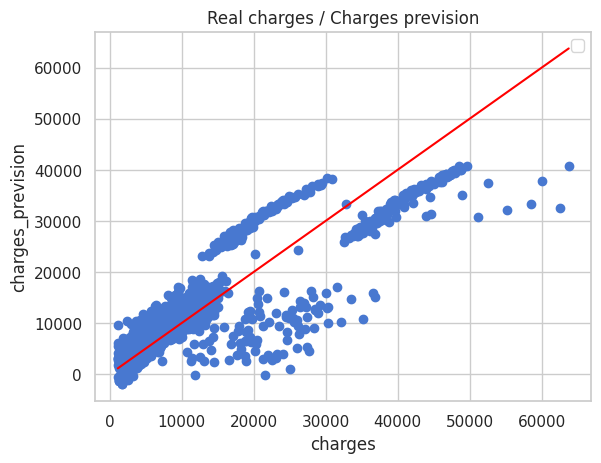

In [48]:
plt.scatter(y_vetor2, y_pred_OLS_vetor2)
plt.xlabel('charges')
plt.ylabel('charges_prevision')
    
plt.title('Real charges / Charges prevision')


ideal_values = np.linspace(min(y_vetor2), max(y_vetor2)) 
plt.plot(ideal_values, ideal_values, color='red')
plt.legend()
plt.show()